In [20]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#load the dataset
sales_data = pd.read_csv("https://raw.githubusercontent.com/gamesconsort/cga-internship-projects/main/probabilistic-sales-forecasting/data/supermarket_sales_data")

In [3]:
#check the first five rows of the dataset
sales_data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
#check the data distribution
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [5]:
#check for missing values
sales_data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
#replacing 2019 in the date field with 2022
import datetime

In [7]:
#transform Date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date']) #convert the column to datetime to perform date operations                               
sales_data['Date'] = sales_data['Date'].map(lambda x: x.replace(year = 2022))

In [8]:
sales_data['Date'].head()

0   2022-01-05
1   2022-03-08
2   2022-03-03
3   2022-01-27
4   2022-02-08
Name: Date, dtype: datetime64[ns]

In [9]:
sales_data.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.220360e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

### Exploratory Data Analysis

In [10]:
sales_data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2022-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2022-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2022-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2022-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2022-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

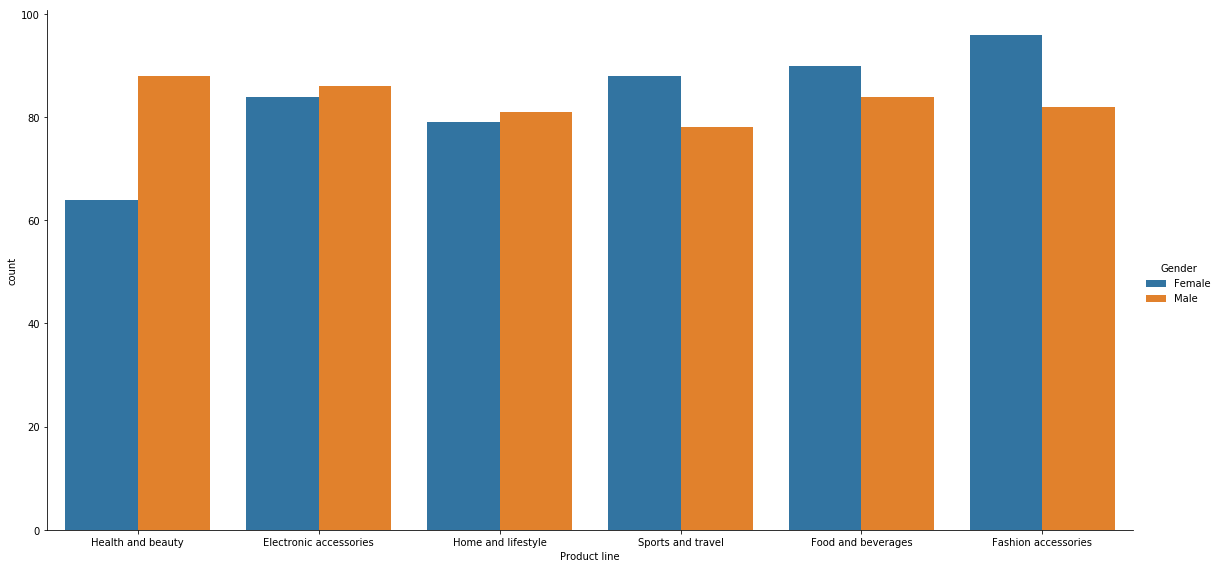

In [11]:
#checking the count of the gender for each product line
sns.catplot(x='Product line', hue='Gender',kind ='count', data=sales_data, aspect=2, height=8)

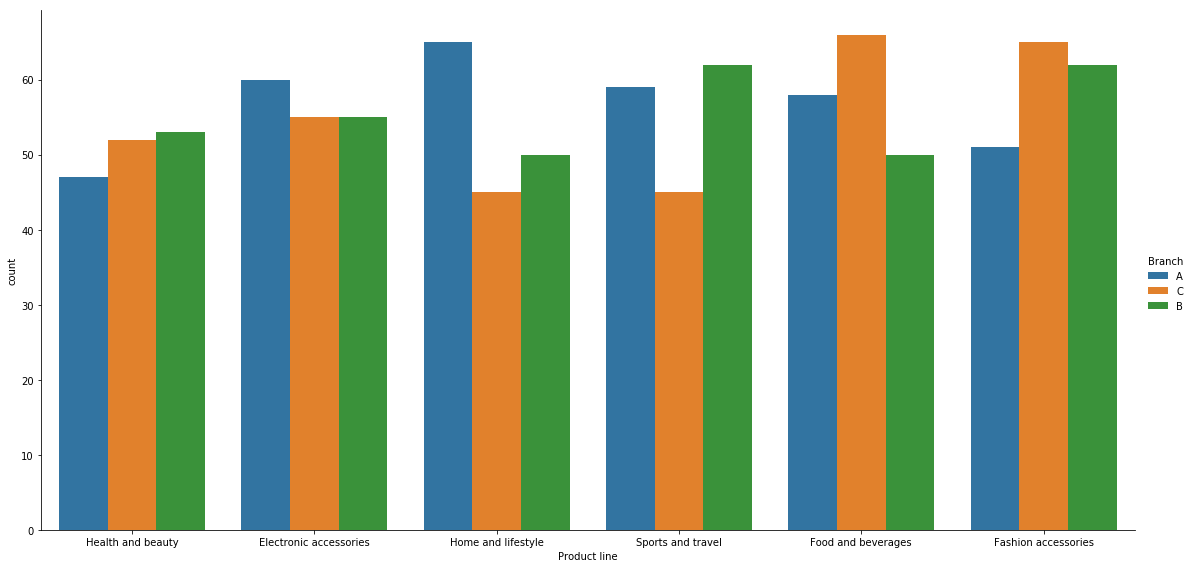

In [12]:
#count of branch for each product line
sns.catplot(x='Product line', hue='Branch',kind ='count', data=sales_data, aspect=2, height=8)

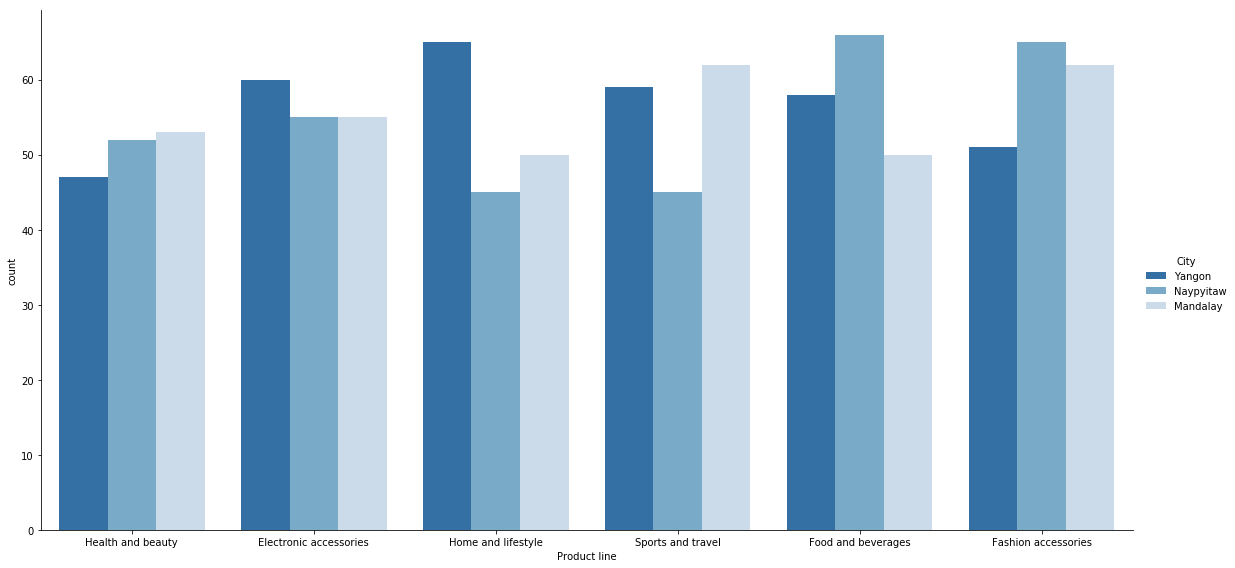

In [13]:
#count of city for each product line
sns.catplot(x='Product line', hue='City',kind ='count', data=sales_data, aspect=2, height=8,palette="Blues_r")

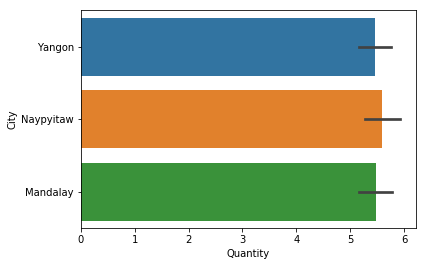

In [14]:
#barplot showing quantity in each city
sns.barplot(x="Quantity",y="City",data=sales_data)

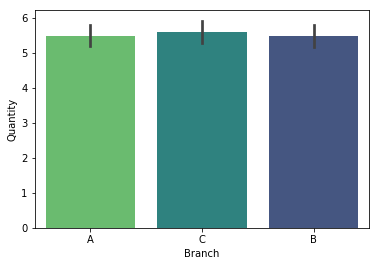

In [15]:
#barplot showing quantity in each Branch
sns.barplot(x="Branch",y="Quantity",data=sales_data,palette="viridis_r")

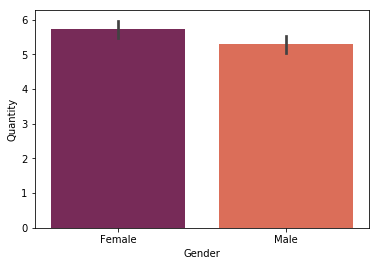

In [16]:
#barplot showing quantity relating to Gender
sns.barplot(x="Gender",y="Quantity",data=sales_data,palette="rocket")

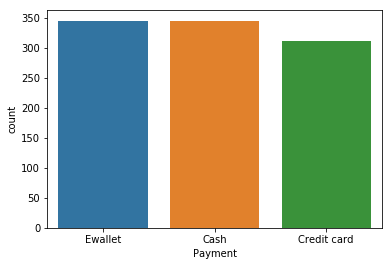

In [18]:
# which payment channel is used most
sns.countplot(x="Payment", data=sales_data)

   ### The most used payment channel is Ewallet, followed by Cash payment

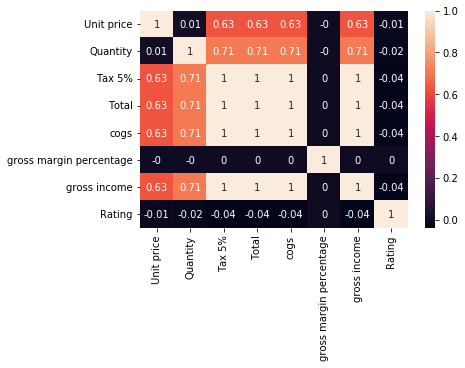

In [24]:
#check for correlation in the dataset
sns.heatmap(np.round(sales_data.corr(),2),annot = True)

### From the heatmap there is a positive correlation between "Unit price" and "cogs" at 63%, there is also a high correlation between "Quantity" and "gross income" at 71%